In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from tabulate import tabulate

**Visual inspection of data (rows, columns, descriptive details)	**

In [ ]:

df = pd.read_csv('/content/Social+Media+Data+for+DSBA.csv')

In [ ]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
df.head()


First few rows of the DataFrame:


,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


** Visual inspection of data (rows, columns, descriptive details)	**

In [ ]:
# Display the shape of the DataFrame (number of rows and columns)
print("\nShape of the DataFrame:")
df.shape




Shape of the DataFrame:


(11760, 17)

In [ ]:
# Drop the 'UserID' column
df_without_userid = df.drop(columns=['UserID'])

# Generate the summary statistics for numerical columns without 'UserID'
df_without_userid.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Yearly_avg_view_on_travel_page,11179.0,280.830844,68.182958,35.0,232.00,271.0,324.00,464.0
total_likes_on_outstation_checkin_given,11379.0,28170.481765,14385.032134,3570.0,16380.00,28076.0,40525.00,252430.0
Yearly_avg_comment_on_travel_page,11554.0,74.790029,24.026650,3.0,57.00,75.0,92.00,815.0
total_likes_on_outofstation_checkin_received,11760.0,6531.699065,4706.613785,1009.0,2940.75,4948.0,8393.25,20065.0
week_since_last_outstation_checkin,11760.0,3.203571,2.616365,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,11760.0,28.661565,48.660504,11.0,17.00,22.0,27.00,500.0
travelling_network_rating,11760.0,2.712245,1.080887,1.0,2.00,3.0,4.00,4.0
Adult_flag,11760.0,0.793878,0.851823,0.0,0.00,1.0,1.00,3.0
Daily_Avg_mins_spend_on_traveling_page,11760.0,13.817432,9.070657,0.0,8.00,12.0,18.00,270.0


**Understanding of attributes (variable info, renaming if required)**

In [ ]:
# Display information about the DataFrame including data types and non-null values
print("\nInformation about the DataFrame:")
df.info()



Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation

In [ ]:
# Step 1: Drop completely empty columns
df_cleaned = df.dropna()
df_cleaned.reset_index(drop=True, inplace=True)

# Replace 'three' with '3'
df_cleaned['member_in_family'] = df_cleaned['member_in_family'].replace('Three', 3).astype(int)
df_cleaned = df_cleaned[df_cleaned['yearly_avg_Outstation_checkins'] != '*']
df_cleaned.head()

<ipython-input-166-872577955eea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['member_in_family'] = df_cleaned['member_in_family'].replace('Three', 3).astype(int)


,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10455 entries, 0 to 10455
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        10455 non-null  int64  
 1   Taken_product                                 10455 non-null  object 
 2   Yearly_avg_view_on_travel_page                10455 non-null  float64
 3   preferred_device                              10455 non-null  object 
 4   total_likes_on_outstation_checkin_given       10455 non-null  float64
 5   yearly_avg_Outstation_checkins                10455 non-null  object 
 6   member_in_family                              10455 non-null  int64  
 7   preferred_location_type                       10455 non-null  object 
 8   Yearly_avg_comment_on_travel_page             10455 non-null  float64
 9   total_likes_on_outofstation_checkin_received  10455 non-null  int6

**Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones)**

**Taken_product**

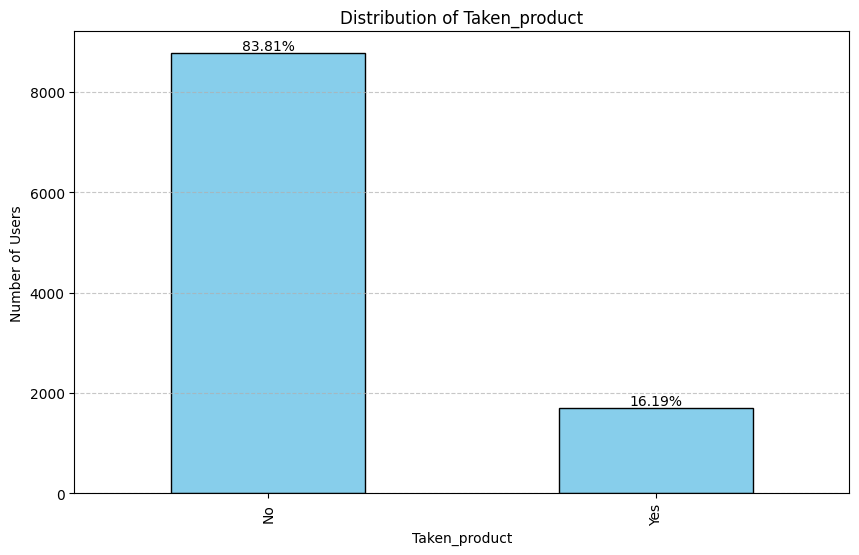

In [ ]:
counts = df_cleaned['Taken_product'].value_counts()
total_users = counts.sum()
# Plot the bar plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Taken_product')
plt.ylabel('Number of Users')
plt.title('Distribution of Taken_product')
# plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, count in enumerate(counts):
    percentage = '{:.2f}%'.format(100 * count / total_users)
    plt.text(i, count, percentage, ha='center', va='bottom')

plt.show()

**Yearly_avg_view_on_travel_page**

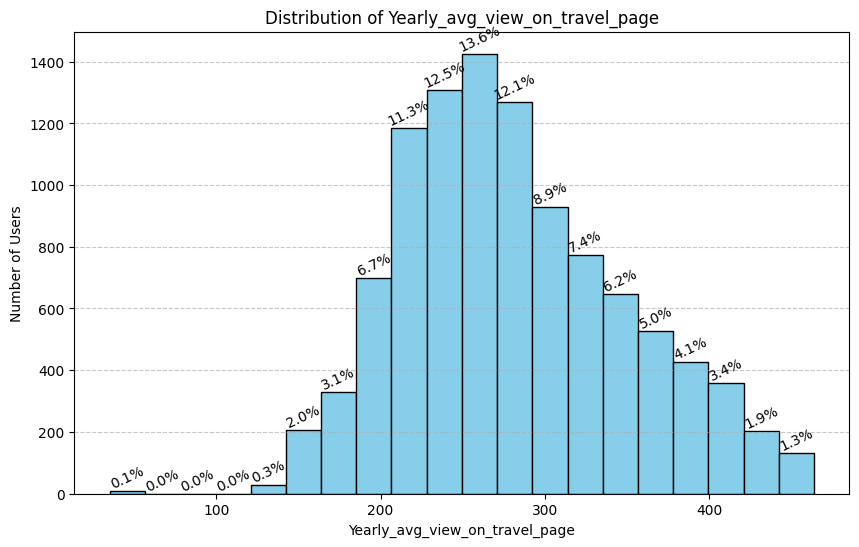

In [ ]:
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(df_cleaned['Yearly_avg_view_on_travel_page'], bins=20, color='skyblue', edgecolor='black', density=False)
plt.xlabel('Yearly_avg_view_on_travel_page')
plt.ylabel('Number of Users')
plt.title('Distribution of Yearly_avg_view_on_travel_page')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count and percentage labels on top of each bar
total_users = len(df_cleaned['Yearly_avg_view_on_travel_page'])
for i in range(len(bins) - 1):
    count = int(hist[i])
    percentage = (count / total_users) * 100
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], f"{percentage:.1f}%", ha='center', va='bottom', rotation=25)

plt.show()
# for i in range(len(bins) - 1):
#     plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], str(int(hist[i])), ha='center', va='bottom')

# plt.show()

# **preferred_device**

In [ ]:
# Count the occurrences of each device type
device_counts = Counter(df_cleaned['preferred_device'])

# Convert the device_counts dictionary into a DataFrame
df_device_counts = pd.DataFrame.from_dict(device_counts, orient='index', columns=['Count'])

# Calculate the percentage for each device type
df_device_counts['Percentage'] = (df_device_counts['Count'] / df_device_counts['Count'].sum()) * 100

# Print the DataFrame
df_device_counts

,Count,Percentage
iOS and Android,3246,31.047346
iOS,859,8.216165
ANDROID,97,0.927786
Android,244,2.333812
Android OS,126,1.205165
Other,2,0.019130
Others,1,0.009565
Tab,4172,39.904352
Laptop,1108,10.597800
Mobile,600,5.738881


In [ ]:
# Subtract the count of 'laptop' from the total count to obtain the count of 'mobile'
total_count = sum(device_counts.values())
laptop_count = device_counts.get('Laptop', 0)
mobile_count = total_count - laptop_count

# Create a DataFrame with the device type, count, and percentage
df_device_counts = pd.DataFrame({'Device Type': ['Laptop', 'Mobile'],
                                 'Count': [laptop_count, mobile_count],
                                 'Percentage': [laptop_count / total_count * 100, mobile_count / total_count * 100]})

# Print the DataFrame
print(df_device_counts)


  Device Type  Count  Percentage
0      Laptop   1108     10.5978
1      Mobile   9347     89.4022


**total_likes_on_outstation_checkin_given**

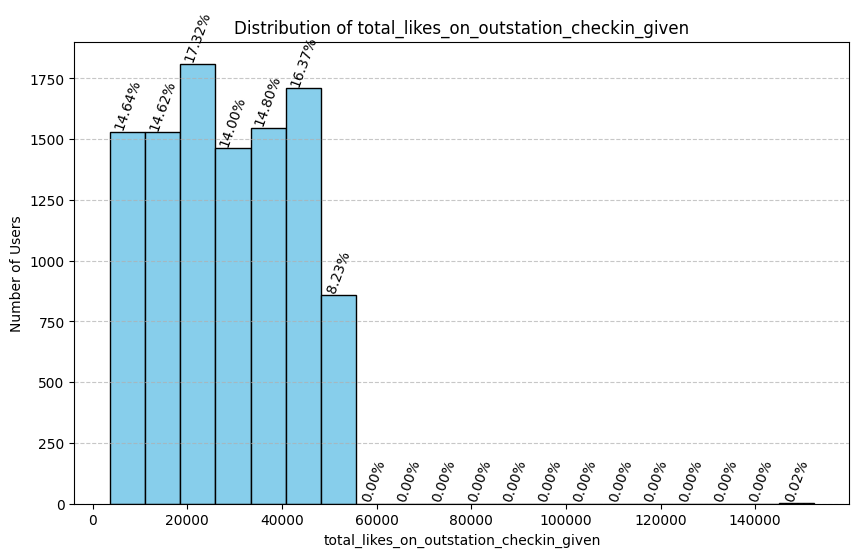

In [ ]:
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(df_cleaned['total_likes_on_outstation_checkin_given'], bins=20, color='skyblue', edgecolor='black', density=False)
plt.xlabel('total_likes_on_outstation_checkin_given')
plt.ylabel('Number of Users')
plt.title('Distribution of total_likes_on_outstation_checkin_given')
plt.grid(axis='y', linestyle='--', alpha=0.7)
total_users = len(df_cleaned['Yearly_avg_view_on_travel_page'])
for i in range(len(bins) - 1):
    count = int(hist[i])
    percentage = (count / total_users) * 100
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], f"{percentage:.2f}%", ha='center', va='bottom', rotation=70)

plt.show()


very few users have the number of total_likes_on_outstation_checkin_given are more than 59250. So we are makng value morethan 56000 as 56000.

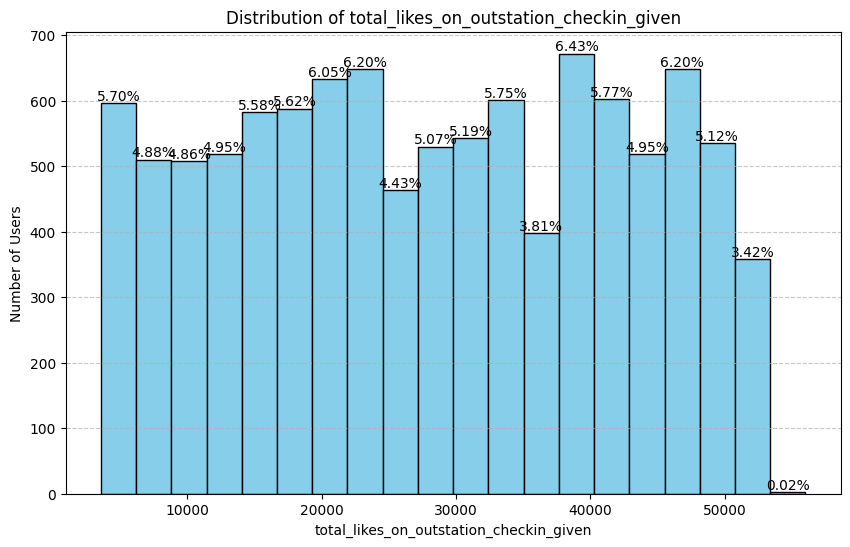

In [ ]:
# Define the condition for handling outliers
condition =df_cleaned['total_likes_on_outstation_checkin_given'] > 56000

# Replace values based on the condition
df_cleaned.loc[condition, 'total_likes_on_outstation_checkin_given'] = 56000
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(df_cleaned['total_likes_on_outstation_checkin_given'], bins=20, color='skyblue', edgecolor='black', density=False)
plt.xlabel('total_likes_on_outstation_checkin_given')
plt.ylabel('Number of Users')
plt.title('Distribution of total_likes_on_outstation_checkin_given')
plt.grid(axis='y', linestyle='--', alpha=0.7)
total_users = len(df_cleaned['Yearly_avg_view_on_travel_page'])
for i in range(len(bins) - 1):
    count = int(hist[i])
    percentage = (count / total_users) * 100
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], f"{percentage:.2f}%", ha='center', va='bottom')

plt.show()

**yearly_avg_Outstation_checkins**

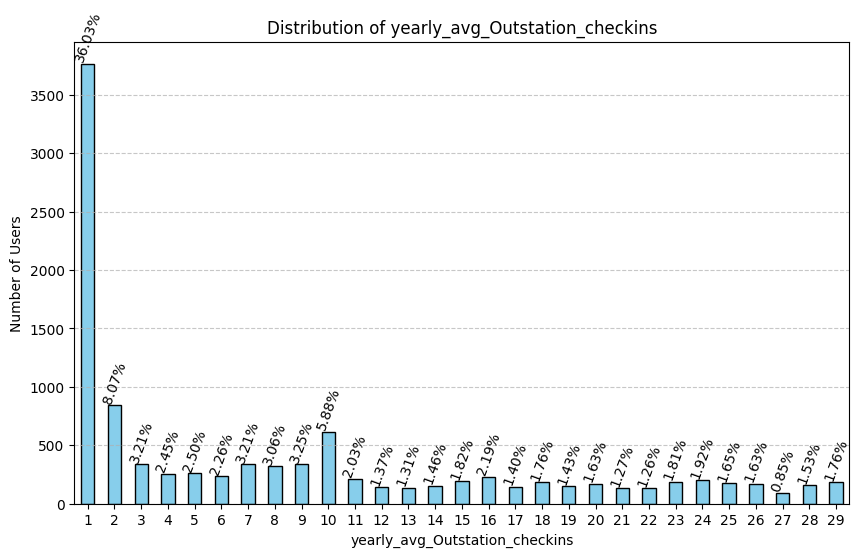

In [ ]:
counts = df_cleaned['yearly_avg_Outstation_checkins'].value_counts().sort_index()
counts.index = counts.index.astype(int)  # Convert index to integer for proper numerical sorting
counts = counts.sort_index()  # Ensure sorting

total_users = counts.sum()

# Plot the bar plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('yearly_avg_Outstation_checkins')
plt.ylabel('Number of Users')
plt.title('Distribution of yearly_avg_Outstation_checkins')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentages to the bars
for i, count in enumerate(counts):
    percentage = '{:.2f}%'.format(100 * count / total_users)
    plt.text(i, count, percentage, ha='center', va='bottom', rotation=70)

plt.show()

In [ ]:

plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(df_cleaned['yearly_avg_Outstation_checkins'], bins=20, color='skyblue', edgecolor='black', density=False)
plt.xlabel('yearly_avg_Outstation_checkins')
plt.ylabel('Number of Users')
plt.title('Distribution of yearly_avg_Outstation_checkins')
plt.grid(axis='y', linestyle='--', alpha=0.7)
total_users = len(df_cleaned['Yearly_avg_view_on_travel_page'])
for i in range(len(bins) - 1):
    count = int(hist[i])
    percentage = (count / total_users) * 100
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], f"{percentage:.2f}%", ha='center', va='bottom', rotation=70)

plt.show()

**member_in_family**

In [ ]:
counts = df_cleaned['member_in_family'].value_counts().sort_index()
total_users = counts.sum()
# Plot the bar plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Number of Members in Family')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of Members in Family')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, count in enumerate(counts):
    percentage = '{:.2f}%'.format(100 * count / total_users)
    plt.text(i, count, percentage, ha='center', va='bottom')

plt.show()


**preferred_location_type**

In [ ]:
counts = df_cleaned['preferred_location_type'].value_counts()
total_users = counts.sum()
# Plot the bar plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('preferred_location_type')
plt.ylabel('Number of Users')
plt.title('Distribution of preferred_location_type')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, count in enumerate(counts):
    percentage = '{:.2f}%'.format(100 * count / total_users)
    plt.text(i, count, percentage, ha='center', va='bottom')

plt.show()

**Yearly_avg_comment_on_travel_page**

> Add blockquote



In [ ]:
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(df_cleaned['Yearly_avg_comment_on_travel_page'], bins=20, color='skyblue', edgecolor='black', density=False)
plt.xlabel('Yearly_avg_comment_on_travel_page')
plt.ylabel('Number of Users')
plt.title('Distribution of Yearly_avg_comment_on_travel_page')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count and percentage labels on top of each bar
total_users = len(df_cleaned['Yearly_avg_comment_on_travel_page'])
for i in range(len(bins) - 1):
    count = int(hist[i])
    percentage = (count / total_users) * 100
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], f"{percentage:.2f}%", ha='center', va='bottom', rotation=25)

plt.show()

In [ ]:
# Define the condition for handling outliers
condition = df_cleaned['Yearly_avg_comment_on_travel_page'] > 130

# Replace values based on the condition
df_cleaned.loc[condition, 'Yearly_avg_comment_on_travel_page'] = 130
# masked_values = np.where(df_cleaned['Yearly_avg_comment_on_travel_page'] > 130, 130,df_cleaned['Yearly_avg_comment_on_travel_page'])
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(df_cleaned['Yearly_avg_comment_on_travel_page'], bins=20, color='skyblue', edgecolor='black', density=False)
plt.xlabel('Yearly_avg_comment_on_travel_page')
plt.ylabel('Number of Users')
plt.title('Distribution of Yearly_avg_comment_on_travel_page')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count and percentage labels on top of each bar
total_users = len(df_cleaned['Yearly_avg_comment_on_travel_page'])
for i in range(len(bins) - 1):
    count = int(hist[i])
    percentage = (count / total_users) * 100
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], f"{percentage:.2f}%", ha='center', va='bottom', rotation=25)

plt.show()

**total_likes_on_outofstation_checkin_received**

In [ ]:
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(df_cleaned['total_likes_on_outofstation_checkin_received'], bins=20, color='skyblue', edgecolor='black', density=False)
plt.xlabel('total_likes_on_outofstation_checkin_received')
plt.ylabel('Number of Users')
plt.title('Distribution of total_likes_on_outofstation_checkin_received')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count and percentage labels on top of each bar
total_users = len(df_cleaned['total_likes_on_outofstation_checkin_received'])
for i in range(len(bins) - 1):
    count = int(hist[i])
    percentage = (count / total_users) * 100
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], f"{percentage:.2f}%", ha='center', va='bottom', rotation=25)

plt.show()

**week_since_last_outstation_checkin**

In [ ]:
counts = df_cleaned['week_since_last_outstation_checkin'].value_counts().sort_index()
total_users = counts.sum()
# Plot the bar plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('week_since_last_outstation_checkin')
plt.ylabel('Number of Users')
plt.title('Distribution of week_since_last_outstation_checkin')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, count in enumerate(counts):
    percentage = '{:.2f}%'.format(100 * count / total_users)
    plt.text(i, count, percentage, ha='center', va='bottom')

plt.show()

**following_company_page**

In [ ]:
counts = df_cleaned['following_company_page'].value_counts()
total_users = counts.sum()
# Plot the bar plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('following_company_page')
plt.ylabel('Number of Users')
plt.title('Distribution of following_company_page')
# plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, count in enumerate(counts):
    percentage = '{:.2f}%'.format(100 * count / total_users)
    plt.text(i, count, percentage, ha='center', va='bottom')

plt.show()
print(df_cleaned['following_company_page'].unique())

In [ ]:
df_cleaned['following_company_page'] = df_cleaned['following_company_page'].replace({'1': 'Yes', '0': 'No'})
counts = df_cleaned['following_company_page'].value_counts()
total_users = counts.sum()
# Plot the bar plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('following_company_page')
plt.ylabel('Number of Users')
plt.title('Distribution of following_company_page')
# plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, count in enumerate(counts):
    percentage = '{:.2f}%'.format(100 * count / total_users)
    plt.text(i, count, percentage, ha='center', va='bottom')

plt.show()
print(df_cleaned['following_company_page'].unique())


**montly_avg_comment_on_company_page**

In [ ]:
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(df_cleaned['montly_avg_comment_on_company_page'], bins=20, color='skyblue', edgecolor='black', density=False)
plt.xlabel('montly_avg_comment_on_company_page')
plt.ylabel('Number of Users')
plt.title('Distribution of montly_avg_comment_on_company_page')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count and percentage labels on top of each bar
total_users = len(df_cleaned['montly_avg_comment_on_company_page'])
for i in range(len(bins) - 1):
    count = int(hist[i])
    percentage = (count / total_users) * 100
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], f"{percentage:.2f}%", ha='center', va='bottom', rotation=25)

plt.show()

In [ ]:
masked_values = np.where(df_cleaned['montly_avg_comment_on_company_page'] > 50, 50,df_cleaned['montly_avg_comment_on_company_page'])
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(masked_values, bins=20, color='skyblue', edgecolor='black', density=False)
plt.xlabel('montly_avg_comment_on_company_page')
plt.ylabel('Number of Users')
plt.title('Distribution of montly_avg_comment_on_company_page')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count and percentage labels on top of each bar
total_users = len(df_cleaned['montly_avg_comment_on_company_page'])
for i in range(len(bins) - 1):
    count = int(hist[i])
    percentage = (count / total_users) * 100
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], f"{percentage:.2f}%", ha='center', va='bottom', rotation=25)

plt.show()

## **working_flag**

In [ ]:
counts = df_cleaned['working_flag'].value_counts()
total_users = counts.sum()
# Plot the bar plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('working_flag')
plt.ylabel('Number of Users')
plt.title('Distribution of working_flag')
# plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, count in enumerate(counts):
    percentage = '{:.2f}%'.format(100 * count / total_users)
    plt.text(i, count, percentage, ha='center', va='bottom')

plt.show()

**travelling_network_rating**

In [ ]:
counts = df_cleaned['travelling_network_rating'].value_counts().sort_index()
total_users = counts.sum()
# Plot the bar plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('travelling_network_rating')
plt.ylabel('Number of Users')
plt.title('Distribution of travelling_network_rating')
# plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, count in enumerate(counts):
    percentage = '{:.2f}%'.format(100 * count / total_users)
    plt.text(i, count, percentage, ha='center', va='bottom')

plt.show()

**Adult_flag**

In [ ]:
counts = df_cleaned['Adult_flag'].value_counts()
total_users = counts.sum()
# Plot the bar plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Adult_flag')
plt.ylabel('Number of Users')
plt.title('Distribution of Adult_flag')
# plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, count in enumerate(counts):
    percentage = '{:.2f}%'.format(100 * count / total_users)
    plt.text(i, count, percentage, ha='center', va='bottom')

plt.show()

In the above code the coloumn/attribute is named as the adult_flag. According to the name it should have the yes,no values or 0,1 but it has values ranging from 0 to 3. To find the number represents the number of adults in family or due to the data rolling issue some values that need 1 are having the 2 or 3 I have made the comparision between the member\in\_family and numbr\of\adult\_in\_family. As per theoritical knowledge member\_in\_family must be always greater than the number\_of\_Adults\_in\_family. If we find the users that have the value Adult\_flag grater then the values in Adult\_flag having 2and 3 is due to the data rolling issue.


In [ ]:
# Filter the DataFrame where member_in_family is less than number_of_adults_in_family
users_less_members = df_cleaned[df_cleaned['member_in_family'] < df_cleaned['Adult_flag']]

# Count the number of users
num_users_less_members = len(users_less_members)

# Print the result
print("Number of users with member_in_family less than Adult_flag:", num_users_less_members)

In [ ]:
df_cleaned.rename(columns={'Adult_flag': 'number_of_adults_in_family'}, inplace=True)


In [ ]:
# Count the values in the number_of_adults column
counts = df_cleaned['number_of_adults_in_family'].value_counts()
total_users = counts.sum()

# Plot the bar plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Number of Adults')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of Adults in family')
# plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentages on the bars
for i, count in enumerate(counts):
    percentage = '{:.2f}%'.format(100 * count / total_users)
    plt.text(i, count, percentage, ha='center', va='bottom')

plt.show()


**Daily_Avg_mins_spend_on_traveling_page**

In [ ]:
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(df_cleaned['Daily_Avg_mins_spend_on_traveling_page'], bins=20, color='skyblue', edgecolor='black', density=False)
plt.xlabel('Daily_Avg_mins_spend_on_traveling_page')
plt.ylabel('Number of Users')
plt.title('Distribution of Daily_Avg_mins_spend_on_traveling_page')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count and percentage labels on top of each bar
total_users = len(df_cleaned['Daily_Avg_mins_spend_on_traveling_page'])
for i in range(len(bins) - 1):
    count = int(hist[i])
    percentage = (count / total_users) * 100
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], f"{percentage:.2f}%", ha='center', va='bottom', rotation=25)

plt.show()

In [ ]:
# Define the condition for handling outliers
condition = df_cleaned['Daily_Avg_mins_spend_on_traveling_page'] > 50

# Replace values based on the condition
df_cleaned.loc[condition, 'Daily_Avg_mins_spend_on_traveling_page'] = 50
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(df_cleaned['Daily_Avg_mins_spend_on_traveling_page'], bins=20, color='skyblue', edgecolor='black', density=False)
plt.xlabel('Daily_Avg_mins_spend_on_traveling_page')
plt.ylabel('Number of Users')
plt.title('Distribution of Daily_Avg_mins_spend_on_traveling_page')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add count and percentage labels on top of each bar
total_users = len(df_cleaned['Daily_Avg_mins_spend_on_traveling_page'])
for i in range(len(bins) - 1):
    count = int(hist[i])
    percentage = (count / total_users) * 100
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], f"{percentage:.2f}%", ha='center', va='bottom', rotation=25)
plt.show()

**Bivariate analysis (relationship between different variables , correlations)**

In [ ]:
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.preprocessing import StandardScaler
# import pandas as pd

# # Define a custom transformer to exclude specific columns from normalization
# class ColumnSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, excluded_columns):
#         self.excluded_columns = excluded_columns

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         return X.drop(columns=self.excluded_columns)

# # Define the columns to exclude from normalization
# columns_to_exclude = ['Taken_product', 'UserID', 'preferred_device', 'preferred_location_type', 'working_flag', 'following_company_page']

# # Select the columns to normalize
# columns_to_normalize = ColumnSelector(excluded_columns=columns_to_exclude).fit_transform(df_cleaned)

# # Normalize the selected columns
# scaler = StandardScaler()
# normalized_data = scaler.fit_transform(columns_to_normalize)

# # Create a DataFrame with the normalized data
# normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize.columns)

# # Combine the normalized columns with the excluded columns
# final_df = pd.concat([normalized_df, df_cleaned[columns_to_exclude]], axis=1)


In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# # Define the columns to encode
# columns_to_encode = ['preferred_device', 'preferred_location_type', 'working_flag', 'following_company_page']

# # Define the remaining columns after excluding the ones to be normalized
# remaining_columns = list(set(df_cleaned.columns) - set(columns_to_exclude))

# # Define a custom transformer to exclude specific columns from normalization
# class ColumnSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, excluded_columns):
#         self.excluded_columns = excluded_columns

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         return X.drop(columns=self.excluded_columns)

# # Define a transformer to perform one-hot encoding on categorical attributes
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), remaining_columns),
#         ('cat', OneHotEncoder(), columns_to_encode)
#     ])

# # Fit and transform the data
# processed_data = preprocessor.fit_transform(df_cleaned)

# # Get the names of the remaining columns after one-hot encoding
# remaining_columns_after_encoding = list(preprocessor.transformers_[0][2])
# encoded_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=columns_to_encode))

# # Combine the column names
# final_columns = remaining_columns_after_encoding + encoded_columns

# # Create a DataFrame with the processed data
# final_df = pd.DataFrame(processed_data, columns=final_columns)


In [ ]:
binary_categorial_cols=['Taken_product','working_flag','following_company_page']
categorial_cols=['preferred_device', 'preferred_location_type']


In [ ]:
numerical_cols = ['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given',
                  'yearly_avg_Outstation_checkins', 'member_in_family', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received',
                  'week_since_last_outstation_checkin', 'montly_avg_comment_on_company_page',
                  'travelling_network_rating', 'number_of_adults_in_family',
                  'Daily_Avg_mins_spend_on_traveling_page']

# Compute the correlation matrix
correlation_matrix = df_cleaned[numerical_cols].corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:


# Extract upper triangle of correlation matrix (excluding diagonal)
upper_triangle = correlation_matrix.where(~np.tril(np.ones(correlation_matrix.shape)).astype(bool))

# Stack the correlation matrix to get attribute pairs and their correlations
stacked_corr = upper_triangle.stack().reset_index()

# Rename columns for clarity
stacked_corr.columns = ['Attribute1', 'Attribute2', 'Correlation']

# Filter out rows where Attribute1 and Attribute2 are the same
stacked_corr = stacked_corr[stacked_corr['Attribute1'] != stacked_corr['Attribute2']]

# Get the top 10 correlations
top_10_corr = stacked_corr.nlargest(10, 'Correlation')

# Print the top 10 correlations as a table
top_10_corr


In [ ]:
bottom_5_corr = stacked_corr.nsmallest(5, 'Correlation')
bottom_5_corr

In [ ]:
# # Initialize the LabelEncoder
# label_encoder = LabelEncoder()

# # Apply Label Encoding to the categorical columns
# df_cleaned['preferred_device_encoded'] = label_encoder.fit_transform(df_cleaned['preferred_device'])
# df_cleaned['preferred_location_type_encoded'] = label_encoder.fit_transform(df_cleaned['preferred_location_type'])
# df_cleaned['following_company_page_encoded'] = label_encoder.fit_transform(df_cleaned['following_company_page'])
# df_cleaned['working_flag_encoded'] = label_encoder.fit_transform(df_cleaned['working_flag'])
# df_cleaned['Taken_product_encoded'] = label_encoder.fit_transform(df_cleaned['Taken_product'])
# df_cleaned.drop(["UserID", "Taken_product", "preferred_device", "preferred_location_type", "following_company_page","working_flag", "preferred_device"],axis=1)

# df_cleaned.head()

In [ ]:
# import phik
# binary_categorial_cols=['Taken_product', 'working_flag','following_company_page']
# phi_coefficient = df_cleaned[binary_categorial_cols].phik_matrix()

# heatmap = sns.heatmap(phi_coefficient, vmin=-1, vmax=1, annot=True)
# heatmap.set_title('Correlation Heatmap between binary categorical attributes', fontdict={'fontsize':12}, pad=12);

In [ ]:

# Initialize lists to store inertia values
inertia_values = []

# Define range of k values to test
k_values = range(1, 11)

# Perform KMeans clustering for each k value and calculate inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cleaned[numerical_cols])
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia Plot to Find Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

CLustering is the unsupervised machine learning algorithm and be used on the non labeled data to group the points that have the similar attribute characterstics. But the problem we had in our hand is kind of the supervised learning and of type classification. Even though we thought to try with clustering to see the how maany unique category of the users are present by considering only numerical attributes of data "Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given, yearly_avg_Outstation_checkins,member_in_family, Yearly_avg_comment_on_travel_page,       total_likes_on_outofstation_checkin,week_since_last_outstation_checkin,            montly_avg_comment_on_company_page, travelling_network_rating                   Adult_flag,                                Daily_Avg_mins_spend_on_traveling_page". TO find the unique categeroies the data clustring algorithm has some evaluation method called the elbow plot based on that we are getting the elbow between k=2 and k=3 which means data has two or 3 unique categories.As we know about data which is binary classification data based on that the using kmeans clustering we are getting appropriate result.

**Preprocessing**
In this section, we detail the preprocessing steps undertaken to prepare the dataset for modeling. Preprocessing is a crucial step in the machine learning pipeline as it ensures that the data is clean, well-formatted, and suitable for analysis. Below are the steps performed on our dataset.

1.   Normalization of Numerical Features

To standardize the range of the continuous features, we applied the MinMaxScaler from the scikit-learn library. MinMaxScaler transforms features by scaling each feature to a given range, usually between 0 and 1. This transformation is essential because working with larger values requires more computational resources, and normalizing the data helps make computations more efficient.

The columns normalized include:

Yearly_avg_view_on_travel_page
total_likes_on_outstation_checkin_given
yearly_avg_Outstation_checkins
total_likes_on_outofstation_checkin_received
week_since_last_outstation_checkin
montly_avg_comment_on_company_page
travelling_network_rating
Adult_flag
Daily_Avg_mins_spend_on_traveling_page
Normalization ensures that each feature contributes equally to the analysis and helps in speeding up the convergence of algorithms.

In [ ]:
# Assuming df is your DataFrame containing the dataset
columns_to_normalize = ['Yearly_avg_view_on_travel_page',
                        'total_likes_on_outstation_checkin_given',
                        'yearly_avg_Outstation_checkins',
                        'member_in_family',
                        'Yearly_avg_comment_on_travel_page',
                        'total_likes_on_outofstation_checkin_received',
                        'week_since_last_outstation_checkin',
                        'montly_avg_comment_on_company_page',
                        'travelling_network_rating',
                        'number_of_adults_in_family',
                        'Daily_Avg_mins_spend_on_traveling_page']

# Using MinMaxScaler to normalize between 0 and 1
min_max_scaler = MinMaxScaler()
df_cleaned[columns_to_normalize] = min_max_scaler.fit_transform(df_cleaned[columns_to_normalize])

2.   Handling Categorical Variable

We identified several categorical features in the dataset, such as preferred_device, preferred_location_type, and following_company_page. These features need to be converted into numerical representations for the machine learning algorithms to process.



a. Simplification of Categorical Values
For the preferred_device feature, we simplified the categories by merging all values except 'Laptop' into a single category 'Mobile'. This step helps in reducing the complexity of the feature.

In [ ]:
df_cleaned['preferred_device'] = df_cleaned['preferred_device'].apply(lambda x: 'Mobile' if x != 'Laptop' else x)

b. Label Encoding
We used the LabelEncoder from scikit-learn to convert the categorical features into numerical values. Label encoding assigns a unique integer to each category.

The features encoded include:

preferred_device
preferred_location_type
following_company_page
working_flag
Taken_product (the target variable)

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the categorical columns
df_cleaned['preferred_device_encoded'] = label_encoder.fit_transform(df_cleaned['preferred_device'])
df_cleaned['preferred_location_type_encoded'] = label_encoder.fit_transform(df_cleaned['preferred_location_type'])
df_cleaned['following_company_page_encoded'] = label_encoder.fit_transform(df_cleaned['following_company_page'])
df_cleaned['working_flag_encoded'] = label_encoder.fit_transform(df_cleaned['working_flag'])
df_cleaned['Taken_product_encoded'] = label_encoder.fit_transform(df_cleaned['Taken_product'])



3. Resulting Dataset
After preprocessing, the dataset was transformed into a suitable format for training machine learning models

In [ ]:
# Filter the dataframe where preferred_device_encoded is 1 for mobile
preferred_device_1_df = df_cleaned[df_cleaned['preferred_device_encoded'] == 1]

# Filter the dataframe where preferred_device_encoded is 2 for laptop
preferred_device_2_df = df_cleaned[df_cleaned['preferred_device_encoded'] == 0]
# # Split data into features and target variable
X_mobile = preferred_device_1_df.drop(["UserID", "Taken_product", "preferred_device", "preferred_location_type", "following_company_page","working_flag", "preferred_device_encoded","Taken_product_encoded"], axis=1)
y_mobile = preferred_device_1_df["Taken_product_encoded"]
X_laptop = preferred_device_2_df.drop(["UserID", "Taken_product", "preferred_device", "preferred_location_type", "following_company_page","working_flag", "preferred_device_encoded","Taken_product_encoded"], axis=1)
y_laptop = preferred_device_2_df["Taken_product_encoded"]


**Model building and interpretation.**

Predicting whether a user will purchase a product based on their social media activities is a binary classification problem. Given a labeled dataset, we can employ various machine learning model to construct a better classification model. Some of the classification algorithms are:


*   Logistic Regression
*  Decision Trees
*   Random Forest
*   Gradient Boosting
*   Support Vector Machines (SVM)
*   Naive Bayes
*  AdaBoost
*  K-Nearest Neighbors (KNN)

While various algorithms were initially mentioned, considering the presence of multiple features in the dataset, we can reasonably assume that decision tree classifier or ensemble methods, such as Random Forest, Gradient Boosting, and AdaBoost, are likely to be the most suitable for this classification task.

**Model Selection and Evaluation**
The choice of ML algorithm depends on the structure and amount of data available. We can filter the algorithms based on these factors and train a subset of models.

One of the mentioned algorithm we think not suitable is Naive Bayes classifiers. It assume that features are conditionally independent given the class label. This assumption is often violated in real-world datasets. If features are highly correlated (e.g., "total_likes_on_outofstation_checkin_received", and "Yearly_avg_view_on_travel_page"), Naive Bayes may not perform well. It is more suited for text classification problems where the independence assumption is more reasonable.

Onemore algorithm we think not suitable is KNN. It is a simple algorithm that works well with smaller datasets. However, it can be computationally expensive with large datasets, as it requires calculating the distance to all training points for each prediction. Additionally, KNN requires careful feature scaling and can struggle with categorical features unless properly encoded.

We have eliminated the above two ML algorithms. So we will train the rest of the ML models on training data. But to find the best suitable ML model while traing we have concept name cross validation.

*  **Cross-validation**
Cross-validation is a technique used to assess the performance and generalizability of a machine learning model. It involves partitioning the dataset into multiple subsets, training the model on some of these subsets, and evaluating it on the remaining subsets. A model that consistently achieves high cross-validation scores is likely to perform well on unseen data, indicating its reliability and generalizability.A high cross-validation score suggests that the model generalizes well to different subsets of the data. This implies that the model captures the underlying patterns in the data effectively and is less likely to overfit.





In [ ]:
#Training and cross validation
def training_crossvalidation(X_train,y_train, title):

  # Initialize lists to store results
  classifier_names = []
  cv_scores_list_str = []
  mean_cv_accuracy_list = []

  # Perform cross-validation and evaluate each classifier
  for name, clf in classifiers.items():
      # Perform cross-validation
      cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

      # Calculate mean cross-validation accuracy
      mean_cv_accuracy = cv_scores.mean()

      # Convert cross-validation scores to string representation
      cv_scores_str = [str(scores) for scores in cv_scores]

      # Append results to lists
      classifier_names.append(name)
      cv_scores_list_str.append(cv_scores_str)
      mean_cv_accuracy_list.append(mean_cv_accuracy)
  print(title)
  # Print results as a table using tabulate
  table_data = zip(classifier_names, cv_scores_list_str, mean_cv_accuracy_list)
  table_headers = ["Classifier", "Cross-Validation Scores", "Mean Cross-Validation Accuracy"]
  print(tabulate(table_data, headers=table_headers, tablefmt="grid"))
# Initialize classifiers
random_forest_clf = RandomForestClassifier(random_state=42)
logistic_regression_clf = LogisticRegression(max_iter=1000, random_state=42)
decision_tree_clf = DecisionTreeClassifier(random_state=42)
gradient_boosting_clf = GradientBoostingClassifier(random_state=42)
ada_boosting_clf = AdaBoostClassifier(random_state=42)
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
classifiers = {
      "Random Forest": random_forest_clf,
      "Logistic Regression": logistic_regression_clf,
      "Decision Tree": decision_tree_clf,
      "Gradient Boosting": gradient_boosting_clf,
      "AdaBoost": ada_boosting_clf,
      "Support Vector Machines " :  svm_clf

}
X_train_mobile, X_test_mobile, y_train_mobile, y_test_mobile = train_test_split(X_mobile, y_mobile, test_size=0.3, random_state=42)
X_train_laptop, X_test_laptop, y_train_laptop, y_test_laptop = train_test_split(X_laptop, y_laptop, test_size=0.3, random_state=42)
training_crossvalidation(X_train_mobile, y_train_mobile, "Cross validation output of multiple ML classifiers for mobile data")
training_crossvalidation(X_train_laptop,y_train_laptop,  "Cross validation output of multiple ML classifiers for laptop data")

Based on the cross-validation scores, we observed that the Decision Tree and Random Forest models achieved high accuracies of approximately 0.9688 and 0.9594, respectively. Since these values are very similar, there is a possibility that the model with the slightly lower accuracy may perform better on the test data.

So we have processed to test the decision tree and ramdom forest model using test data. To compare the performances on the test data we have used the metrics such as acurracy, confusion matrices, recall, F1 score, precesion and ROC curve.

**Accuracy**

**Precesion**

**Recall**

**F1 Score**

**ROC curve**
ROC curves provide insights into the models' ability to balance the prediction of positive and negative classes, helping identify the most suitable model for the task and dataset.

In [ ]:
def con_matrix(X_train, y_train, X_test, y_test, title):
  # Iterate over classifiers
  for name, clf in classifiers_filter.items():
      # Fit the model on the training data
      clf.fit(X_train, y_train)

      # Make predictions on the test set
      y_pred = clf.predict(X_test)

      # Evaluate the model on the test set
      test_accuracy = accuracy_score(y_test, y_pred)
      print(f"{name} Test Set Accuracy for {title}:", test_accuracy)

      # Calculate confusion matrix
      cm = confusion_matrix(y_test, y_pred)

      # Plot confusion matrix
      plt.figure(figsize=(8, 6))
      sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
                  xticklabels=["Negative", "Positive"],
                  yticklabels=["Negative", "Positive"])  # Replace "Negative" and "Positive" with your actual class labels
      plt.xlabel('Predicted Label')
      plt.ylabel('True Label')
      plt.title(f'{name} Confusion Matrix for {title}')
      plt.show()

classifiers_filter = {
      "Random Forest": random_forest_clf,
      "Decision Tree": decision_tree_clf,
      "Gradient Boosting": gradient_boosting_clf

  }
con_matrix(X_train_mobile, y_train_mobile, X_test_mobile, y_test_mobile, "mobile data")
con_matrix(X_train_laptop,y_train_laptop, X_test_laptop, y_test_laptop, "laptop data")


In [ ]:
def class_report(X_train, y_train, X_test, y_test, title):
  # Iterate over classifiers
  for name, clf in classifiers_filter.items():
      # Fit the model on the training data
      clf.fit(X_train, y_train)

      # Make predictions on the test set
      y_pred = clf.predict(X_test)

      # Print classification report
      print(f"{name} Classification Report for {title}:")
      print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))  # Replace "Negative" and "Positive" with your actual class labels
      print()

class_report(X_train_mobile, y_train_mobile, X_test_mobile, y_test_mobile, "mobile data")
class_report(X_train_laptop,y_train_laptop, X_test_laptop, y_test_laptop, "laptop data")

In [ ]:
def roc_analysis(X_train, y_train, X_test, y_test, title):
  # Initialize lists to store ROC AUC scores and FPR, TPR, thresholds for ROC curves
  roc_auc_scores = {}
  fpr_dict = {}
  tpr_dict = {}
  thresholds_dict = {}

  # Iterate over classifiers
  for name, clf in classifiers_filter.items():
      # Fit the model on the training data
      clf.fit(X_train, y_train)

      # Make predictions on the test set probabilities
      y_pred_proba = clf.predict_proba(X_test)[:, 1]

      # Calculate ROC AUC score
      roc_auc = roc_auc_score(y_test, y_pred_proba)
      roc_auc_scores[name] = roc_auc

      # Calculate ROC curve
      fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
      fpr_dict[name] = fpr
      tpr_dict[name] = tpr
      thresholds_dict[name] = thresholds

      # Plot ROC curve
      plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

  # Plot ROC curve for each classifier
  plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {title}')
  plt.legend()
  plt.show()

roc_analysis(X_train_mobile, y_train_mobile, X_test_mobile, y_test_mobile, "mobile data")
roc_analysis(X_train_laptop,y_train_laptop, X_test_laptop, y_test_laptop, "laptop data")

**Explanation and Model Selection**

The Random Forest model has a higher accuracy (0.9847) compared to the Decision Tree model (0.9743).

For the Negative Class, the Random Forest model achieves a precision of 0.98, recall of 1.00, and F1-score of 0.99, while the Decision Tree achieves a precision of 0.99, recall of 0.98, and F1-score of 0.98. Both models perform well, but the Random Forest slightly edges out in recall.

For the Positive Class, the Random Forest model achieves a precision of 1.00, recall of 0.89, and F1-score of 0.94, while the Decision Tree achieves a precision of 0.90, recall of 0.92, and F1-score of 0.91. The Random Forest has a perfect precision but slightly lower recall compared to the Decision Tree.

The macro average and weighted average scores for precision, recall, and F1-score are higher for the Random Forest, indicating a better overall performance.


The Random Forest model has an AUC of 1.00, which is perfect, while the Decision Tree has an AUC of 0.95. This indicates that the Random Forest model has a superior ability to discriminate between the positive and negative classes.

Given the above evaluation, the Random Forest model is the better choice for further hyperparameter tuning. So we proceeded to work with random forest.

**Model Tuning**

To further improve the performance of the Random Forest model, you have chosen a set of hyperparameters to tune. Here's a breakdown of the chosen hyperparameters and their respective values:

*  **n_estimators:** Number of trees in the forest. You are considering [100, 200, 290].
*  **max_depth:** Maximum depth of the tree. You are considering [10, 20].
*  **max_features:** Number of features to consider when looking for the best split. You are considering ['log2',0.5,0.9].
*  **bootstrap:** Whether bootstrap samples are used when building trees. You are considering [True, False].
*   **n_jobs** Any positive integer value specifies the exact number of CPU cores to use.


We have received the best accuracy 0.9939 with parameters 'bootstrap': False, 'max_depth': 20, 'max_features': 0.5, 'n_estimators': 290, 'n_jobs': 4.

In [ ]:
def tunning(X_train, y_train, X_test, y_test, title):
  param_grid = {
    'n_estimators': [100, 200, 290],
    'max_depth': [10, 20],
    'criterion':['gini','entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2],
    'max_features' : [0.5, 0.9,'log2'],
    'bootstrap':[True, False],
    'n_jobs': [4]
  }


  # Initialize the Random Forest classifier
  random_forest_clf = RandomForestClassifier(random_state=42)

  # Initialize Grid Search with 5-fold cross-validation
  grid_search = GridSearchCV(random_forest_clf, param_grid, cv=5, scoring='accuracy')

  # Perform grid search on the training data
  grid_search.fit(X_train, y_train)

  # Get the best parameters
  best_params = grid_search.best_params_
  print(f'Best Parameters for {title}:', best_params)

  # Get the best model
  best_rf_model = grid_search.best_estimator_

  # Evaluate the best model on the test set
  test_accuracy = best_rf_model.score(X_test, y_test)
  print(f'Test Set Accuracy on {title}:', test_accuracy)

tunning(X_train_mobile, y_train_mobile, X_test_mobile, y_test_mobile, "mobile data")
tunning(X_train_laptop,y_train_laptop, X_test_laptop, y_test_laptop, "laptop data")

In [ ]:
def tunning1(X_train, y_train, X_test, y_test, title):
  param_grid = {
    'n_estimators': [290],
    'max_features' : [0.5, 0.9,'log2','sqrt'],
    'criterion':['gini','entropy'],
    'bootstrap':[ False],
    'n_jobs': [4]
  }


  # Initialize the Random Forest classifier
  random_forest_clf = RandomForestClassifier(random_state=42)

  # Initialize Grid Search with 5-fold cross-validation
  grid_search = GridSearchCV(random_forest_clf, param_grid, cv=5, scoring='accuracy')

  # Perform grid search on the training data
  grid_search.fit(X_train, y_train)

  # Get the best parameters
  best_params = grid_search.best_params_
  print(f'Best Parameters for {title}:', best_params)

  # Get the best model
  best_rf_model = grid_search.best_estimator_

  # Evaluate the best model on the test set
  test_accuracy = best_rf_model.score(X_test, y_test)
  print(f'Test Set Accuracy on {title}:', test_accuracy)

# tunning(X_train_mobile, y_train_mobile, X_test_mobile, y_test_mobile, "mobile data")
tunning1(X_train_laptop,y_train_laptop, X_test_laptop, y_test_laptop, "laptop data")

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 0.5, 'n_estimators': 290, 'n_jobs': 4}
Test Set Accuracy: 0.9939393939393939

In [ ]:
# Fit the model on the training data
random_forest_clf.fit(X_train, y_train)

# Plot feature importance or coefficients

# Get feature importance scores
importances = random_forest_clf.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importance scores and feature names in descending order of importance
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances, align='center')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()
